# TD4 - Geometric transformations

ATRIM - Option Datasim

Ecole Centrale Nantes

Diana Mateus

Participants : Yassine JAMOUD, Samy HAFFOUDHI

In [1]:
%matplotlib inline
from __future__ import print_function

import math
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform as tf

## 4. Augmented reality

Use the same procedure as in 2 to estimate the transformations allowing to

- create a starwars introductory text overlayed over the ``HyadesPleiades`` image, imagine the coordinates of the desired transformed plane to establish the point correspondences.
<TABLE>
   <TR>
    <TD><img src="HyadesPleiades.jpg" alt="drawing" width="300"/></TD>
    <TD><img src="starwars-text-v-short.png" alt="drawing" width="300"/></TD>
   </TR>
</TABLE>  
- exchange one of the frames inside the ``times-square`` and bring it to the ``museum`` (or visceversa).
<TABLE>
   <TR>
      <TD><img src="times-square.jpg" alt="drawing" width="300"/></TD>
      <TD><img src="museum.png" alt="drawing" width="300"/></TD>
   </TR>
</TABLE>   


**Bonus:** Find the transformation on your own solving for the A=h

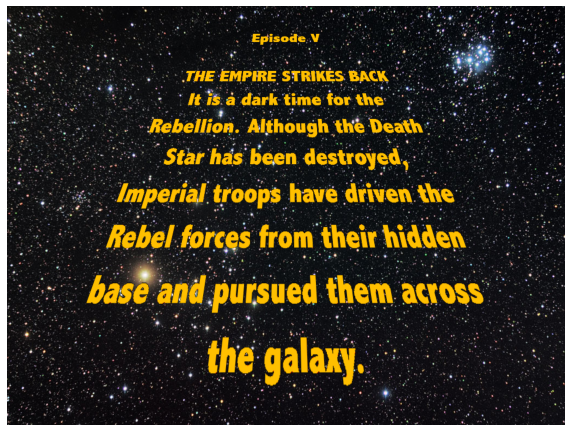

In [7]:
import skimage.io as io

text = io.imread('starwars-text-v-short.png')
space = io.imread('HyadesPleiades.jpg')

text_height, text_width, _ = text.shape
space_height, space_width, _ = space.shape

src = np.array([[300, 40], [space_width-300, 40], [space_width, space_height], [0, space_height]])
dst = np.array([[0, 0], [text_width, 0], [text_width, text_height], [0, text_height]])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(space_height, space_width))

output = np.copy(space).astype('float') / 255
for i in range(space_height):
    for j in range(space_width):
        r, g, b, a = warped[i, j]
        if a != 0:
            output[i, j] = (r, g, b)

fig = plt.figure(figsize=(10, 10))

plt.imshow(output)
plt.axis('off')

plt.show()

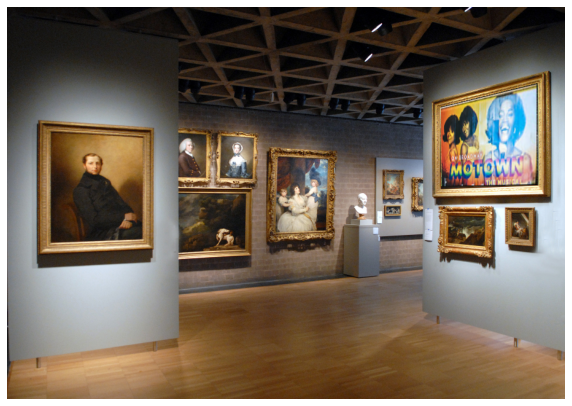

In [12]:
timesquare = io.imread('times-square.jpg')
museum = io.imread('museum.png')

timesquare_height, timesquare_width, _ = timesquare.shape
museum_height, museum_width, _ = museum.shape

# 1iere transformation

dst = np.array([[116, 213], [278, 356], [248, 448], [34, 332]])
src = np.array([[0, 0], [150, 0], [150, 70], [0, 70]])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(timesquare, tform3, output_shape=(70, 150))

# 2e transformation

dst = np.array([[0, 0], [150, 0], [150, 70], [0, 70]])
src = np.array([[706, 164], [863, 126], [863, 289], [707, 292]])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(warped, tform3, output_shape=museum.shape)

# fusion des 2 images

output = np.copy(museum) / 255
for i in range(museum_height):
    for j in range(museum_width):
        r, g, b = warped[i, j]
        if (r, g, b) != (0, 0, 0):
            output[i, j] = warped[i, j]

fig = plt.figure(figsize=(10, 10))

plt.imshow(output)
plt.axis('off')

plt.show()